# Nightlight Summary Statistics Model

## Imports

In [1]:
import os
import sys
sys.path.insert(0, '../utils')
import model_utils
import data_utils

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
#%autoreload 2

## File Locations

In [2]:
# Google Cloud Storage
bucket_name = 'tm-geospatial'
directory = 'poverty-prediction-datasets'

# Destination paths
ntl_summary_stats_file = '../data/nightlights_summary_stats.csv'
dhs_indicators_file = '../data/dhs_indicators.csv'

## Download Datasets

In [3]:
# Download from Google Cloud Storage
data_utils.download_from_bucket('nightlights_summary_stats.csv', directory, ntl_summary_stats_file, bucket_name);
data_utils.download_from_bucket('dhs_indicators.csv', directory, dhs_indicators_file, bucket_name);

../data/nightlights_summary_stats.csv successfully downloaded
../data/dhs_indicators.csv successfully downloaded


## Load Datasets

In [4]:
# Load nighttime lights dataset
ntl_summary_stats = pd.read_csv(ntl_summary_stats_file, encoding="ISO-8859-1")
dhs_indicators = pd.read_csv(dhs_indicators_file)
dhs = ntl_summary_stats.merge(dhs_indicators, left_on='DHSCLUST', right_on='Cluster number')

# Define feature columns
feature_cols = ['cov', 'max', 'mean', 'median','min', 'std', 'kurtosis', 'skewness']

## Correlations

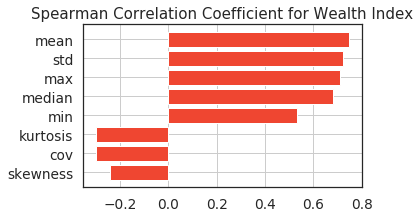

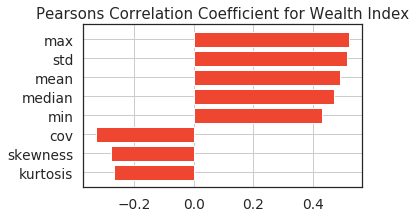

In [6]:
data_utils.plot_corr(
    data=dhs,
    features_cols=feature_cols,
    indicator = 'Wealth Index',
    figsize=(5,3)
)

## Machine Learning Pipeline

### Configuration

In [7]:
# Scoring metrics
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error'
}

# Indicators of interest
indicators = [
    'Wealth Index',
    'Log Wealth Index',
    'Education completed (years)',
    'Access to electricity',
    'Access to water (minutes)'
]

### Random Forest

Socioeconomic indicator: Wealth Index
test_neg_mse : -2186168127.4361
[-2.53570766e+09 -2.08493440e+09 -1.82005034e+09 -2.20252913e+09
 -2.28761911e+09]
test_r2 : 0.5633
[0.50605922 0.61396343 0.58548767 0.58064099 0.53031679]
train_r2 : 0.6347
[0.62476222 0.59939856 0.63612679 0.63146848 0.68151563]
score_time : 0.6677
[0.81441116 0.93563128 0.41004324 0.96256089 0.21572351]
train_neg_mse : -1837053946.9825
[-1.86952833e+09 -1.97929340e+09 -1.88851427e+09 -1.83231454e+09
 -1.61561920e+09]
fit_time : 684.1638
[689.24422288 674.40641832 689.55648541 680.95043182 686.66163921]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=777, n_jobs=-1,
           oob_score=False, random_state=42, ver

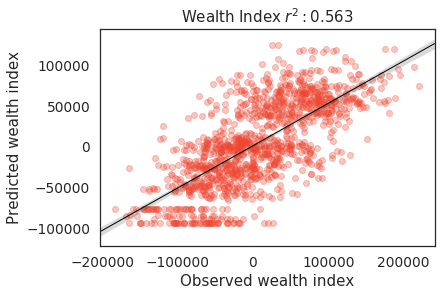

Socioeconomic indicator: Log Wealth Index
test_neg_mse : -0.2047
[-0.09298201 -0.09301233 -0.09008353 -0.64761027 -0.09964452]
test_r2 : 0.4619
[0.49343533 0.5618431  0.54288484 0.20436328 0.50704631]
train_r2 : 0.4114
[0.3759704  0.35844203 0.39873273 0.54811997 0.37592522]
score_time : 1.3849
[1.28491735 1.04400921 1.97449636 1.92656541 0.6944201 ]
train_neg_mse : -0.1944
[-0.22272262 -0.22515568 -0.21330917 -0.09015091 -0.22051595]
fit_time : 797.3700
[802.80855894 793.98124385 802.17462301 784.42654729 803.45900941]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=591, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


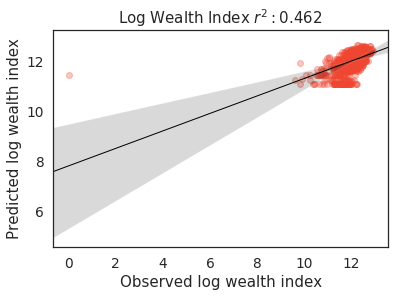

Socioeconomic indicator: Education completed (years)
test_neg_mse : -3.1321
[-3.12600323 -3.5184638  -3.18369724 -2.88149708 -2.9510797 ]
test_r2 : 0.4274
[0.38226681 0.42808753 0.39300784 0.50485312 0.42867928]
train_r2 : 0.4660
[0.47620386 0.46666985 0.4745357  0.44626085 0.46610401]
score_time : 1.4967
[1.4359951  1.93385053 1.44671869 1.12772608 1.5393486 ]
train_neg_mse : -2.9410
[-2.93524917 -2.85187024 -2.92373224 -3.00684168 -2.98705746]
fit_time : 1357.6305
[1345.1757369  1369.08393812 1358.76629758 1364.11842656 1351.00829458]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=1682, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


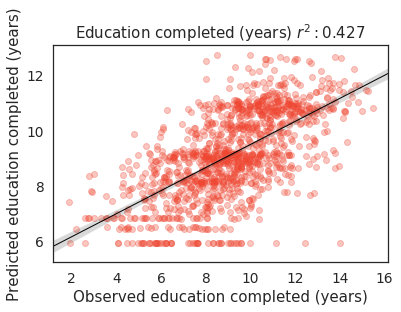

Socioeconomic indicator: Access to electricity
test_neg_mse : -0.0152
[-0.01054461 -0.01410085 -0.01609586 -0.0194322  -0.01601966]
test_r2 : 0.2666
[0.18347289 0.26985071 0.32513595 0.262142   0.29234701]
train_r2 : 0.3681
[0.31637693 0.33672588 0.31805366 0.33962762 0.52953952]
score_time : 1.2434
[0.94503689 0.99073029 2.23026586 0.86531425 1.18577313]
train_neg_mse : -0.0134
[-0.01578256 -0.01430355 -0.01392855 -0.01305784 -0.00975988]
fit_time : 1383.0528
[1381.58967972 1381.16724849 1380.03991866 1389.60150456 1382.86576629]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=591, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


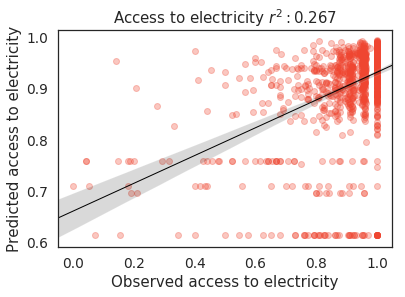

Socioeconomic indicator: Access to water (minutes)
test_neg_mse : -64.9650
[-161.65679394  -64.24597868  -46.69957658  -26.46053164  -25.76221214]
test_r2 : 0.0183
[ 0.04431675  0.06130778 -0.04928174 -0.07965826  0.11471352]
train_r2 : 0.0920
[0.11229078 0.09183902 0.08326988 0.08146692 0.09097308]
score_time : 1.5215
[1.26195741 2.23304272 1.3967216  0.96082735 1.75472164]
train_neg_mse : -61.2584
[-37.02031325 -60.88206469 -66.93202644 -71.6011258  -69.85631901]
fit_time : 973.6445
[973.20371699 945.30709791 984.59829402 980.76106429 984.3521595 ]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1790, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False

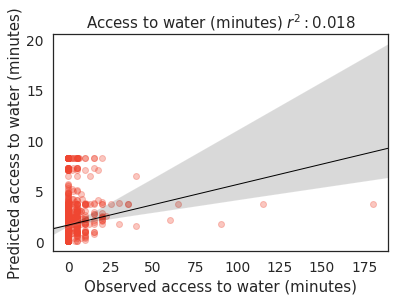

In [8]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=50, 
)

### XGBoost

Socioeconomic indicator: Wealth Index
test_neg_mse : -2226426150.5378
[-2.60156937e+09 -2.07812130e+09 -1.95426180e+09 -2.23267793e+09
 -2.26550035e+09]
test_r2 : 0.5546
[0.49322975 0.61522491 0.55492131 0.57490069 0.53485811]
train_r2 : 0.7314
[0.74096777 0.7210882  0.73235405 0.72834921 0.73421799]
score_time : 0.1023
[0.09993386 0.0851891  0.05252075 0.20972824 0.06400418]
train_neg_mse : -1351320413.9353
[-1.29056325e+09 -1.37804865e+09 -1.38909151e+09 -1.35062993e+09
 -1.34826873e+09]
fit_time : 444.9043
[451.50763941 452.33212638 448.48156881 422.72217417 449.47791624]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9821375753058743, gamma=3.2527433580545853,
       learning_rate=0.012558638821471693, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=979, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=

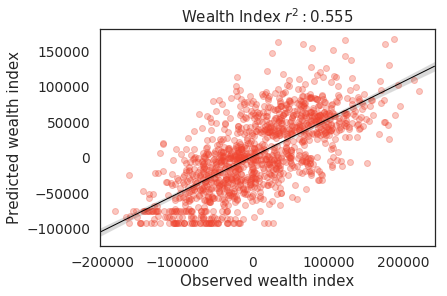

Socioeconomic indicator: Log Wealth Index
test_neg_mse : -0.2051
[-0.09186718 -0.0973846  -0.09009036 -0.64707619 -0.09883333]
test_r2 : 0.4599
[0.49950893 0.54124646 0.54285018 0.20501943 0.51105935]
train_r2 : 0.4307
[0.39628575 0.35960665 0.39627972 0.5911582  0.4101129 ]
score_time : 0.0072
[0.00556326 0.00591135 0.00377464 0.01042032 0.01020575]
train_neg_mse : -0.1889
[-0.21547186 -0.22474695 -0.21417942 -0.0815647  -0.20843578]
fit_time : 460.3255
[451.52408338 461.53970432 463.90072179 461.88994098 462.7729497 ]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9430340184037542, gamma=0.6047237108112165,
       learning_rate=0.14619162948927475, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=1925, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, s

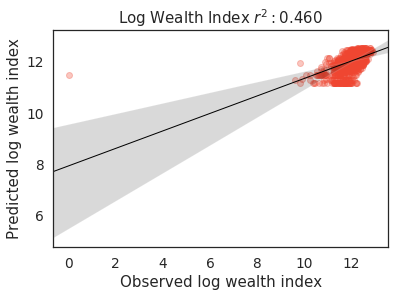

Socioeconomic indicator: Education completed (years)
test_neg_mse : -3.2041
[-3.2293159  -3.56443799 -3.24999421 -2.91906631 -3.05791603]
test_r2 : 0.4138
[0.36185107 0.4206146  0.3803679  0.49839735 0.40799607]
train_r2 : 0.6310
[0.63567891 0.62025882 0.63441868 0.60847753 0.65633271]
score_time : 0.0132
[0.01275802 0.015975   0.01605678 0.01309991 0.00818038]
train_neg_mse : -2.0310
[-2.04158279 -2.03058568 -2.03412845 -2.12599396 -1.92276016]
fit_time : 225.3156
[225.72114563 225.2708559  225.17131281 226.12495708 224.28982353]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9821375753058743, gamma=3.2527433580545853,
       learning_rate=0.012558638821471693, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=979, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, s

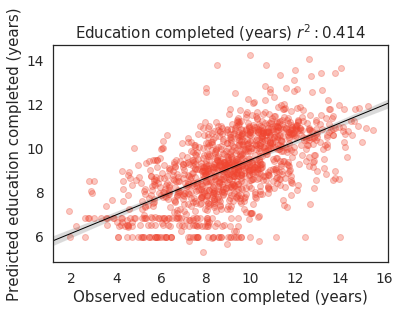

Socioeconomic indicator: Access to electricity
test_neg_mse : -0.0159
[-0.01003816 -0.01480661 -0.01750711 -0.02060544 -0.01651557]
test_r2 : 0.2420
[0.22268975 0.23330586 0.26596561 0.21759289 0.2704407 ]
train_r2 : 0.2674
[0.27615536 0.27441339 0.25236528 0.27210558 0.2619126 ]
score_time : 0.0070
[0.0072875  0.00564694 0.00651979 0.00940299 0.006212  ]
train_neg_mse : -0.0155
[-0.01671114 -0.01564732 -0.01527021 -0.01439298 -0.0153119 ]
fit_time : 232.4867
[232.00048351 232.50268388 233.30605483 231.24772859 233.3763907 ]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9430340184037542, gamma=0.6047237108112165,
       learning_rate=0.14619162948927475, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=1925, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=No

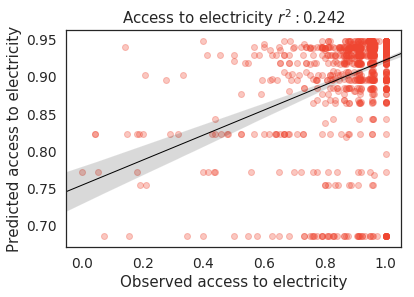

Socioeconomic indicator: Access to water (minutes)
test_neg_mse : -67.5200
[-165.00685605  -64.21795169  -49.3274025   -29.84635797  -29.20148191]
test_r2 : -0.0487
[ 0.02451184  0.06171728 -0.10832574 -0.21780874 -0.00347272]
train_r2 : 0.2963
[0.39427997 0.37738066 0.27001286 0.21588931 0.2241033 ]
score_time : 0.0127
[0.01544356 0.01385951 0.00705838 0.01629114 0.01076198]
train_neg_mse : -48.2092
[-25.26046215 -41.7396826  -53.29760313 -61.12268521 -59.62561354]
fit_time : 230.7609
[230.37723684 231.20478487 230.80301714 230.52258849 230.89683151]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9821375753058743, gamma=3.2527433580545853,
       learning_rate=0.012558638821471693, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=979, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, 

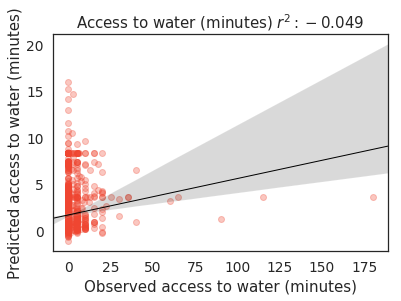

In [9]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='xgboost', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=50, 
)

### Lasso Regression

Socioeconomic indicator: Wealth Index
train_neg_mse : -3478518838.0363
[-3.43368265e+09 -3.47929272e+09 -3.55404962e+09 -3.43008175e+09
 -3.49548746e+09]
fit_time : 1.2521
[1.40742493 1.4239347  1.48200369 1.36524892 0.58173156]
score_time : 0.0018
[0.00173831 0.00206137 0.00175929 0.00206685 0.00156236]
test_r2 : 0.2904
[0.26760036 0.33753605 0.25930118 0.29190373 0.29571022]
test_neg_mse : -3547865400.1933
[-3.75986652e+09 -3.57788352e+09 -3.25227753e+09 -3.71901548e+09
 -3.43028395e+09]
train_r2 : 0.3086
[0.31081683 0.29580441 0.31521648 0.31011123 0.31094027]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=0.6239780813448106, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])


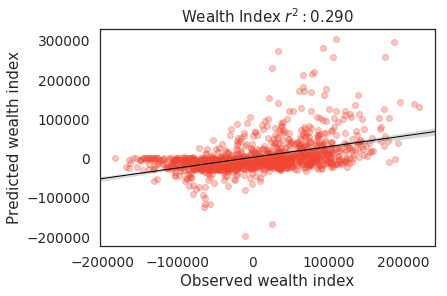

Socioeconomic indicator: Log Wealth Index
train_neg_mse : -0.2802
[-0.3126709  -0.30993602 -0.30988041 -0.15921609 -0.30937473]
fit_time : 0.4884
[0.49650669 0.54489064 0.52047181 0.56078696 0.3192451 ]
score_time : 0.0016
[0.0016439  0.0017302  0.00174546 0.00120711 0.00175786]
test_r2 : 0.1656
[0.17308295 0.22408608 0.17975397 0.0551481  0.19612009]
test_neg_mse : -0.2819
[-0.151784   -0.16471169 -0.16164561 -0.76906429 -0.16249442]
train_r2 : 0.1387
[0.12395113 0.11686915 0.12652163 0.20193179 0.12444896]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=0.6239780813448106, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])


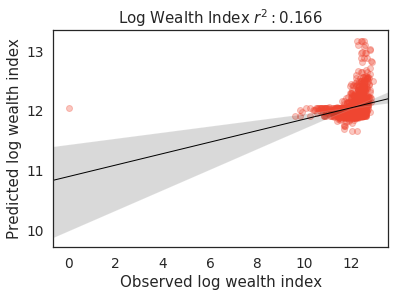

Socioeconomic indicator: Education completed (years)
train_neg_mse : -4.2029
[-4.25851294 -4.0749406  -4.22157761 -4.16775012 -4.29157478]
fit_time : 0.4463
[0.42783093 0.55485511 0.46161628 0.52333641 0.26395535]
score_time : 0.0016
[0.00157976 0.0017128  0.00174427 0.0014286  0.00170755]
test_r2 : 0.2301
[0.20933088 0.22753711 0.20966641 0.25143912 0.25261206]
test_neg_mse : -4.2231
[-4.00113552 -4.75227036 -4.14533013 -4.35623461 -3.86053106]
train_r2 : 0.2369
[0.24006703 0.23794265 0.24128198 0.23246826 0.23293925]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=0.6239780813448106, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])


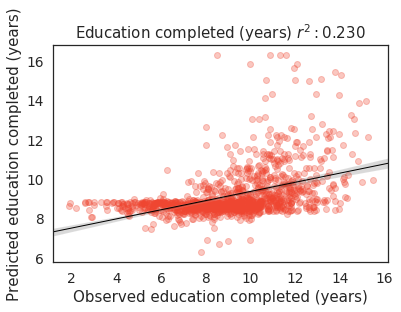

Socioeconomic indicator: Access to electricity
train_neg_mse : -0.0208
[-0.02254621 -0.0212198  -0.02005499 -0.01951819 -0.02042053]
fit_time : 0.4438
[0.53536749 0.51767063 0.42117381 0.42705798 0.31788969]
score_time : 0.0014
[0.00146985 0.00162959 0.00168061 0.00106668 0.00123   ]
test_r2 : 0.0066
[-0.00937868  0.01471503  0.01123423  0.00168586  0.01475463]
test_neg_mse : -0.0208
[-0.01303509 -0.0190281  -0.02358259 -0.02629156 -0.02230373]
train_r2 : 0.0172
[0.02340881 0.01601014 0.0181009  0.0129087  0.01565871]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=0.6239780813448106, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])


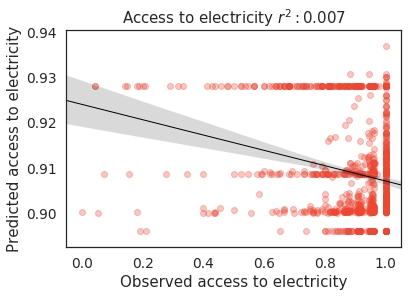

Socioeconomic indicator: Access to water (minutes)
train_neg_mse : -66.3911
[-41.01311992 -66.08640662 -72.02527815 -76.92159354 -75.90894281]
fit_time : 0.4130
[0.36636019 0.41542077 0.43976212 0.49264765 0.3508687 ]
score_time : 0.0031
[0.00168633 0.00138259 0.00170732 0.00960994 0.0012176 ]
test_r2 : 0.0129
[0.00571706 0.01081409 0.00995787 0.01161402 0.0266084 ]
test_neg_mse : -66.5001
[-168.18605215  -67.70186762  -44.06304489  -24.2236082   -28.32610853]
train_r2 : 0.0139
[0.01654737 0.01420729 0.01351049 0.01321344 0.01221145]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=2.3946339367881464, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])


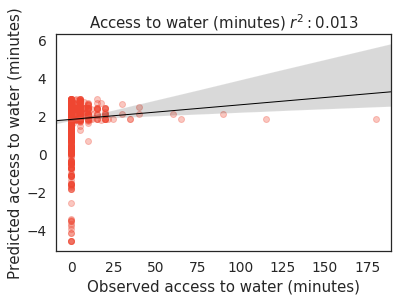

In [8]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='lasso', 
    refit='r2', 
    search_type='grid', 
    n_splits=5
)

### Ridge Regression

Socioeconomic indicator: Wealth Index
train_neg_mse : -3468256473.1910
[-3.42529660e+09 -3.46633476e+09 -3.54178928e+09 -3.41492481e+09
 -3.49293692e+09]
fit_time : 0.8936
[0.990242   0.97252059 0.98740768 1.17270732 0.34515357]
score_time : 0.0016
[0.00137758 0.00136495 0.00145459 0.00185776 0.00172257]
test_r2 : 0.2918
[0.27576872 0.3413683  0.26074661 0.28588031 0.2952177 ]
test_neg_mse : -3540876830.0356
[-3.71793320e+09 -3.55718601e+09 -3.24593089e+09 -3.75065128e+09
 -3.43268277e+09]
train_r2 : 0.3106
[0.31250002 0.29842705 0.31757877 0.31315973 0.31144305]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])


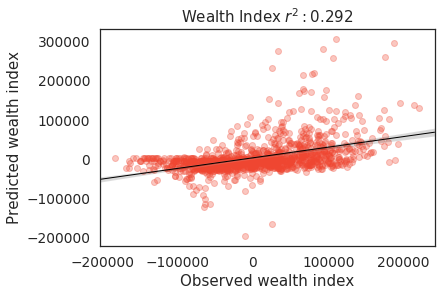

Socioeconomic indicator: Log Wealth Index
train_neg_mse : -0.2712
[-0.30372007 -0.29974017 -0.30010191 -0.15135848 -0.30131614]
fit_time : 0.4783
[0.42163444 0.58578801 0.47370434 0.56574368 0.34463072]
score_time : 0.0016
[0.00159073 0.00164413 0.00143313 0.00172758 0.00143123]
test_r2 : 0.1913
[0.21105884 0.23980512 0.19087138 0.07111994 0.24367672]
test_neg_mse : -0.2749
[-0.14481337 -0.16137484 -0.15945471 -0.75606398 -0.15288143]
train_r2 : 0.1675
[0.14902978 0.14592117 0.15408488 0.24131796 0.14725531]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])


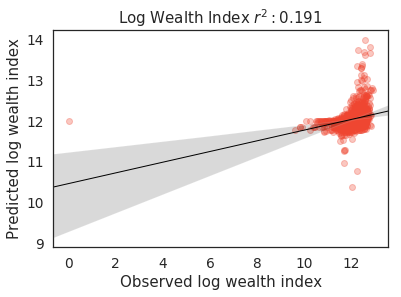

Socioeconomic indicator: Education completed (years)
train_neg_mse : -4.0968
[-4.17091703 -3.9611225  -4.1073578  -4.07082736 -4.17385574]
fit_time : 0.4505
[0.44681692 0.44491363 0.45077515 0.58246708 0.32760048]
score_time : 0.0015
[0.00144267 0.00134206 0.00165176 0.00153375 0.00160122]
test_r2 : 0.2415
[0.23446599 0.23265718 0.21706457 0.26891373 0.25431698]
test_neg_mse : -4.1615
[-3.87394073 -4.72077118 -4.10652648 -4.25454152 -3.85172452]
train_r2 : 0.2562
[0.25569855 0.25922785 0.26181    0.25031753 0.25397993]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])


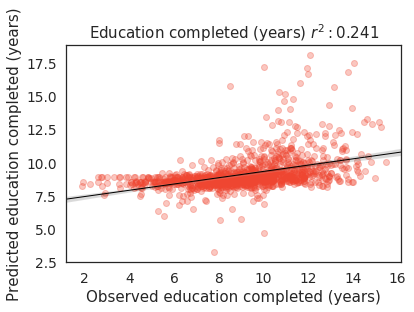

Socioeconomic indicator: Access to electricity
train_neg_mse : -0.0188
[-0.02043563 -0.01915881 -0.0181402  -0.01758282 -0.01864966]
fit_time : 0.4512
[0.57938576 0.55900264 0.44052172 0.43165946 0.24566364]
score_time : 0.0021
[0.0041523  0.00153995 0.00151324 0.00196385 0.00150132]
test_r2 : 0.0854
[0.02408101 0.09108958 0.0875081  0.0920241  0.13247513]
test_neg_mse : -0.0191
[-0.01260299 -0.01755313 -0.02176341 -0.02391242 -0.0196388 ]
train_r2 : 0.1100
[0.11482876 0.11158097 0.11184955 0.11078631 0.10102076]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])


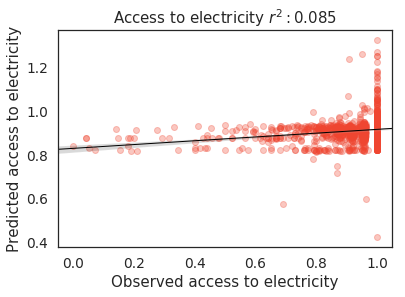

Socioeconomic indicator: Access to water (minutes)
train_neg_mse : -66.5193
[-41.07689973 -66.13868817 -72.27071832 -76.94237435 -76.16777804]
fit_time : 0.4332
[0.47411251 0.32676649 0.46933579 0.54970384 0.34589982]
score_time : 0.0024
[0.00165462 0.00156689 0.001652   0.00153971 0.00555253]
test_r2 : 0.0103
[0.0035748  0.00997301 0.0073494  0.00883786 0.02184246]
test_neg_mse : -66.6487
[-168.54842149  -67.75943311  -44.17913815  -24.29164703  -28.46479935]
train_r2 : 0.0121
[0.01501799 0.01342742 0.01014883 0.01294686 0.00884327]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=1.49816047538945, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=42, solver='auto', tol=0.001))])


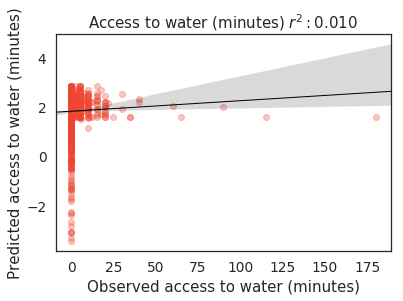

In [7]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='ridge', 
    refit='r2', 
    search_type='grid', 
    n_splits=5
)